# Exercise: Cascading Processes on Networks


In this exercise, we implement and analyse the models presented in  the lecture.  We provide you with an almost complete mesa model that implements all the model variants discussed in the lecture.
Only the simplest *constant load inward and outward variants* are left out for you to implement. 


### Tasks
1. **Complete the `inward` and `outward` model variants**  
    Inspect the code provided to you.
    You find incomplete code stubs starting on line 75 in `agent.py`, which you should complete.
    
2. **Test your implementation**  
    Run the model variant you implemented for known cascade processes and confirm the correctness of your implementation.
    
3. **Compute the $(\mu, \sigma)$ phase diagram seen in the lecture**  
    In the lecture you saw the results of calculations from the macroscopic perspective to the problem for varying means and variances of the load distribution.  Here, you are asked to reproduce the  $(\mu, \sigma)$ diagram through microscopic ABM simulation


In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from model import CascadeNetwork

## Task 2: run the model

Once you finish Task 1 (see above), you can test if the model works correctly.

The adjacency matrix, loads and capacities shown here are taken from the original paper by Lorenz et. al., 
`DOI: 10.1140/epjb/e2009-00347-4`

You can find the rest of the examples in the paper implemented in `test.py`.  
Note that you can run that file in command line and see the model evolution reported over time:
```
$ python3 test.py
Step 0:
Node 0 (Capacity = 1.7): Load 1.00, non-failed
Node 1 (Capacity = 1.7): Load 1.00, non-failed
Node 2 (Capacity = 1.3): Load 1.00, non-failed
Node 3 (Capacity = 1.3): Load 1.00, non-failed
...
```

In [2]:
adj_matrix = np.matrix([[0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [1, 1, 0, 1, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 1, 0, 1, 1, 1, 1],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0]])

load_vec_7 = [1, 1, 3.6, 1, 1, 1, 1, 1, 1]
capacity_vec_7 = [1.7, 1.7, 1.3, 1.3, 1.5, 1.55, 1.55, 1.55, 1.55]

In [3]:
model = CascadeNetwork(adj_matrix, load_vec_7, capacity_vec_7,
                       model_type="constant", load_type="in", test=True)
model.run_model()

Step 0:
Node 1 (Capacity = 1.7): Load 1.00, non-failed
Node 2 (Capacity = 1.7): Load 1.00, non-failed
Node 3 (Capacity = 1.3): Load 3.60, failing
Node 4 (Capacity = 1.3): Load 1.00, non-failed
Node 5 (Capacity = 1.5): Load 1.00, non-failed
Node 6 (Capacity = 1.55): Load 1.00, non-failed
Node 7 (Capacity = 1.55): Load 1.00, non-failed
Node 8 (Capacity = 1.55): Load 1.00, non-failed
Node 9 (Capacity = 1.55): Load 1.00, non-failed
------------------------------------------------------------
Step 1:
Node 1 (Capacity = 1.7): Load 1.00, non-failed
Node 2 (Capacity = 1.7): Load 1.00, non-failed
Node 3 (Capacity = 1.3): Load 0.00, failed
Node 4 (Capacity = 1.3): Load 0.50, non-failed
Node 5 (Capacity = 1.5): Load 0.00, non-failed
Node 6 (Capacity = 1.55): Load 0.00, non-failed
Node 7 (Capacity = 1.55): Load 0.00, non-failed
Node 8 (Capacity = 1.55): Load 0.00, non-failed
Node 9 (Capacity = 1.55): Load 0.00, non-failed
------------------------------------------------------------
Step 2:
Node 1 

#### Testing your implementation

Note, that it is difficult to judge if your implementation is correct from the above example.
Instead, try the model for a smaller network, for which first compute the cascade by hand. Then, compare the simulation and the result computed by hand.

In [4]:
# Network setup: 5 nodes and an edge list
nnodes = 5
edges = [(0, 1), (0, 2), (0, 3), (3, 4)]

# Initialize a zero-filled adjacency matrix
adj_test = np.zeros((nnodes, nnodes))

# Populate the matrix using edges, making it undirected in the process
for i, j in edges:
    adj_test[i, j] = adj_test[j, i] = 1

# Alternatively, build the matrix using numpy indexing and make it undirected
adj_test1 = np.zeros((nnodes, nnodes))
adj_test1[tuple(zip(*edges))] = 1
adj_test1 += adj_test1.T  # Ensure it's undirected

# Check if both methods yield the same result
print('Are the two matrices the same?', np.array_equal(adj_test, adj_test1))
print('\nAdjacency Matrix:\n', adj_test)


Are the two matrices the same? True

Adjacency Matrix:
 [[0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


Now, let us run the *inward* and *outward* variants of the model for the given adjacency and the following loads and capacities.

You can confirm the correctness of the model dynamics by simple manual calculation based on formulas in lecture. You may find it helpful to plot the network at each step. For this, you may use the function provided in `plotting_functions.py`

In [5]:
from plotting_functions import plot_graph_with_labels

In [6]:
load_vec_test = [0,0,0,0,0]
capacity_vec_test = [0, .7, .3, .8, .5]

In [7]:
model = CascadeNetwork(adj_test, load_vec_test, capacity_vec_test,
                       model_type="constant", load_type="in", test=True)
pos = nx.spring_layout(model.network) # to keep a constant layout for the plot

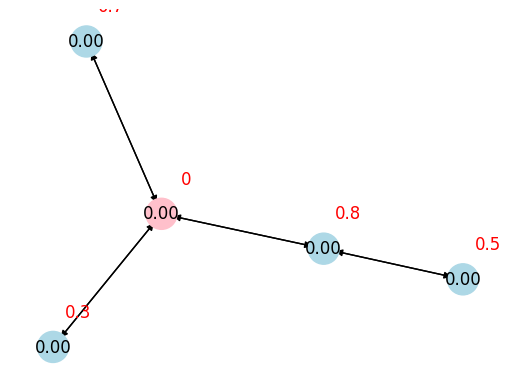

Step 0:
Node 1 (Capacity = 0): Load 0.00, failing
Node 2 (Capacity = 0.7): Load 0.00, non-failed
Node 3 (Capacity = 0.3): Load 0.00, non-failed
Node 4 (Capacity = 0.8): Load 0.00, non-failed
Node 5 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------


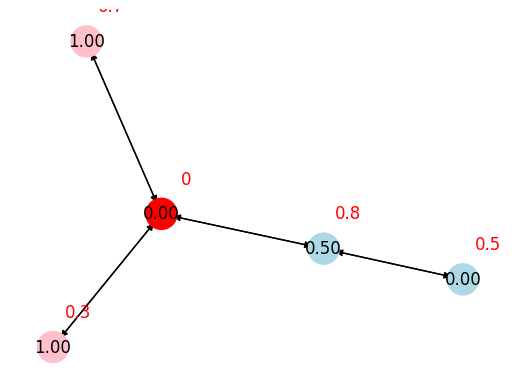

Step 1:
Node 1 (Capacity = 0): Load 0.00, failed
Node 2 (Capacity = 0.7): Load 1.00, failing
Node 3 (Capacity = 0.3): Load 1.00, failing
Node 4 (Capacity = 0.8): Load 0.50, non-failed
Node 5 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------


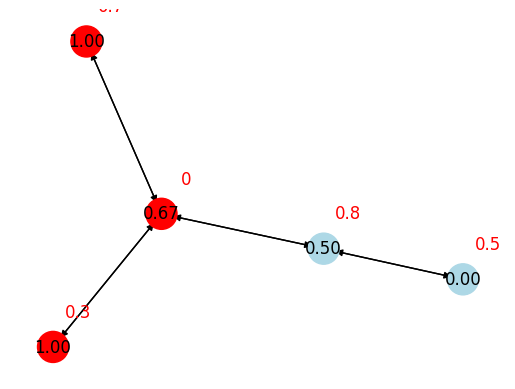

Step 2:
Node 1 (Capacity = 0): Load 0.67, failed
Node 2 (Capacity = 0.7): Load 1.00, failed
Node 3 (Capacity = 0.3): Load 1.00, failed
Node 4 (Capacity = 0.8): Load 0.50, non-failed
Node 5 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------


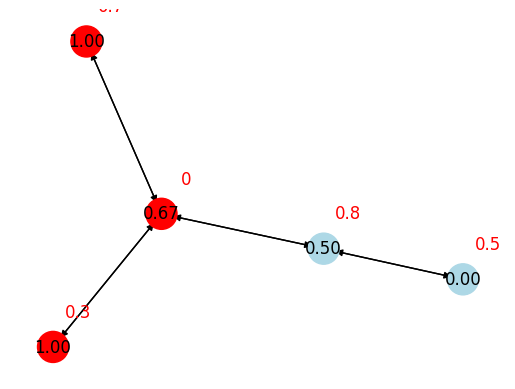

Step 3:
Node 1 (Capacity = 0): Load 0.67, failed
Node 2 (Capacity = 0.7): Load 1.00, failed
Node 3 (Capacity = 0.3): Load 1.00, failed
Node 4 (Capacity = 0.8): Load 0.50, non-failed
Node 5 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------


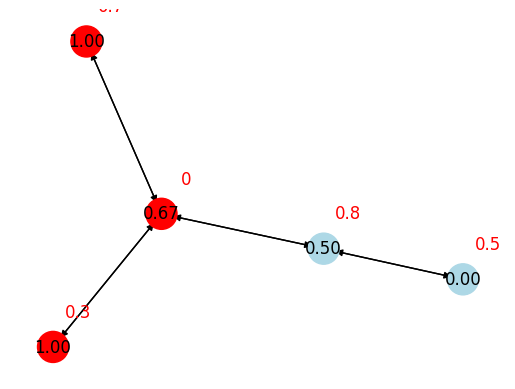

Step 4:
Node 1 (Capacity = 0): Load 0.67, failed
Node 2 (Capacity = 0.7): Load 1.00, failed
Node 3 (Capacity = 0.3): Load 1.00, failed
Node 4 (Capacity = 0.8): Load 0.50, non-failed
Node 5 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------


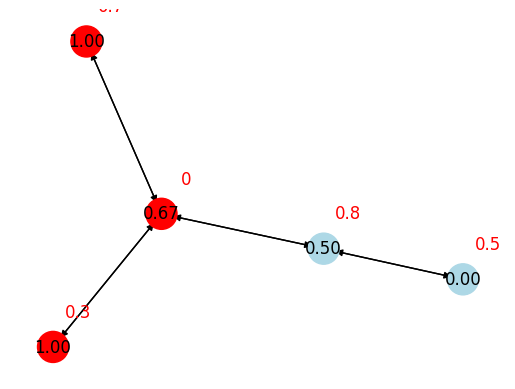

Step 5:
Node 1 (Capacity = 0): Load 0.67, failed
Node 2 (Capacity = 0.7): Load 1.00, failed
Node 3 (Capacity = 0.3): Load 1.00, failed
Node 4 (Capacity = 0.8): Load 0.50, non-failed
Node 5 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------


In [8]:
while model.running:
    G = model.network.copy()
    load_vec = [a.load for a in model.agents]
    capacity_vec = [a.capacity for a in model.agents]

    nodes = list(G.nodes())
    for i, node in enumerate(nodes):
        G.nodes[node]['load'] = round(load_vec[i], 2)
        G.nodes[node]['capacity'] = capacity_vec[i]
        if node in model.healthy_ids:
            G.nodes[node]['state'] = 'healthy'
        elif node in model.failing_ids:
            G.nodes[node]['state'] = 'failing'
        else:
            G.nodes[node]['state'] = 'failed'

    plot_graph_with_labels(G, pos=pos)
    model.step()

In [9]:
# outward variant
model = CascadeNetwork(adj_test, load_vec_test, capacity_vec_test,
                       model_type="constant", load_type="out", test=True)
model.run_model()

Step 0:
Node 1 (Capacity = 0): Load 0.00, failing
Node 2 (Capacity = 0.7): Load 0.00, non-failed
Node 3 (Capacity = 0.3): Load 0.00, non-failed
Node 4 (Capacity = 0.8): Load 0.00, non-failed
Node 5 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------
Step 1:
Node 1 (Capacity = 0): Load 0.00, failed
Node 2 (Capacity = 0.7): Load 0.33, non-failed
Node 3 (Capacity = 0.3): Load 0.33, failing
Node 4 (Capacity = 0.8): Load 0.33, non-failed
Node 5 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------
Step 2:
Node 1 (Capacity = 0): Load 1.00, failed
Node 2 (Capacity = 0.7): Load 0.33, non-failed
Node 3 (Capacity = 0.3): Load 0.33, failed
Node 4 (Capacity = 0.8): Load 0.33, non-failed
Node 5 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------
Step 3:
Node 1 (Capacity = 0): Load 1.00, failed
Node 2 (Capacity = 0.7): Load 0.33, non-failed
Node 3 (Capacity

## Task 3: Phase diagram

In [10]:
def fraction_failed(model):
    """Return the fraction of the failed nodes for the given `model`"""
    states = [node.failed for node in model.agents]
    N = model.num_nodes
    return sum(states) / N

In [21]:
fixed_params = {'adj_matrix': adj_matrix,
                'load_vec': np.ones(adj_matrix.shape[0]), # all load equal to one
                'model_type': 'constant', 
                'load_type': 'in'}


mus = np.arange(0, 1, step=0.01)
sigmas = np.arange(0, 1, step=0.01)
repetitions = 10

In [22]:
from tqdm import tqdm

In [23]:
average_cascade_size = np.zeros((len(mus), len(sigmas)))

for i, mu in tqdm(enumerate(mus)):
    for j, sigma in enumerate(sigmas):
        sizes = []
        for _ in range(repetitions):
            c_vec = np.random.normal(mu, sigma, size=adj_matrix.shape[0])
            model = CascadeNetwork(capacity_vec=c_vec, **fixed_params)
            
            while model.running and model.steps < 100:
                model.steps += 1  # Simulate model step
                model.step()
            
            sizes.append(fraction_failed(model))
        
        average_cascade_size[i, j] = np.mean(sizes)

0it [00:00, ?it/s]

100it [01:24,  1.19it/s]


Now, let us plot the phase diagram.

Display the correct values of $\mu$ and $\sigma$ on the axes. Refer to `pyplot` documentation to learn how.

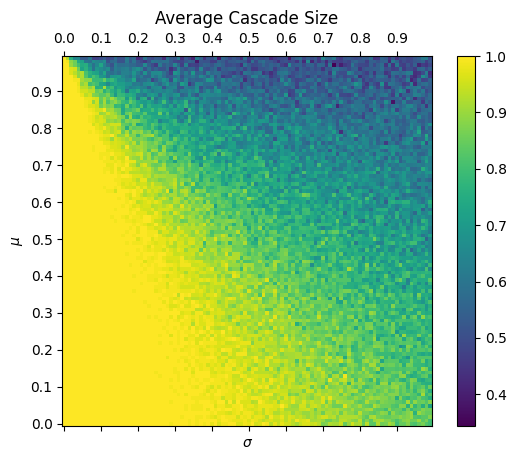

In [24]:
# plot the average cascade size with respect to mu and sigma
fig, ax = plt.subplots()
cax = ax.matshow(average_cascade_size, cmap='viridis', origin = 'lower')
fig.colorbar(cax)

# # Set ticks only for every 10th value
ax.set_xticks(np.arange(0, len(sigmas), 10))
ax.set_yticks(np.arange(0, len(mus), 10))

# # Set tick labels
ax.set_xticklabels([np.round(x,1) for x in sigmas[::10]])
ax.set_yticklabels([np.round(x,1) for x in mus[::10]])



plt.xlabel('$\\sigma$')
plt.ylabel('$\\mu$')
plt.title('Average Cascade Size')
plt.show()